<a href="https://colab.research.google.com/github/teonakuzmanovska/Data-Science/blob/master/labs/lab1/lab1_191523.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
# Install chromium, its driver, and selenium.
!apt update
!apt install chromium-chromedriver
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [589 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,389 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,278 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,012

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Configuration

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [ ]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [ ]:
# Navigate to a web page.
browser.get('https://www.apple.com/mk/')

In [ ]:
# Print the page source code.
print(browser.page_source)

In [ ]:
# Select an element from the page.
element = browser.find_element(By.CLASS_NAME, 'headline')

In [ ]:
# Print the element's innner text.
print(element.text)

iPhone 15 Pro


# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://www.scrapethissite.com/pages/forms/. The task includes the extraction of **hockey team names** and their **wins** and **losses** in the respective **year** for a minimum of 25 hockey teams. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of wins and losses in the year 1990.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [ ]:
# Write your code here.
browser.get('https://www.scrapethissite.com/pages/forms/')

In [ ]:
# Add as many code boxes as you need.
# Print the page source code.
print(browser.page_source)

In [ ]:
team_names = browser.find_elements(By.CLASS_NAME, 'name')
wins = browser.find_elements(By.CLASS_NAME, 'wins')
losses = browser.find_elements(By.CLASS_NAME, 'losses')
year = browser.find_elements(By.CLASS_NAME, 'year')
names_list = []
wins_list = []
losses_list = []
year_list = []
for i, j, z, k in zip(team_names, wins, losses, year):
  names_list.append(i.text)
  wins_list.append(j.text)
  losses_list.append(z.text)
  year_list.append(k.text)

In [ ]:
print(names_list)
print(wins_list)
print(losses_list)
print(year_list)

['Boston Bruins', 'Buffalo Sabres', 'Calgary Flames', 'Chicago Blackhawks', 'Detroit Red Wings', 'Edmonton Oilers', 'Hartford Whalers', 'Los Angeles Kings', 'Minnesota North Stars', 'Montreal Canadiens', 'New Jersey Devils', 'New York Islanders', 'New York Rangers', 'Philadelphia Flyers', 'Pittsburgh Penguins', 'Quebec Nordiques', 'St. Louis Blues', 'Toronto Maple Leafs', 'Vancouver Canucks', 'Washington Capitals', 'Winnipeg Jets', 'Boston Bruins', 'Buffalo Sabres', 'Calgary Flames', 'Chicago Blackhawks']
['44', '31', '46', '49', '34', '37', '31', '46', '27', '39', '32', '25', '36', '33', '41', '16', '47', '23', '28', '37', '26', '36', '31', '31', '36']
['24', '30', '26', '23', '38', '37', '38', '24', '39', '30', '33', '45', '31', '37', '33', '50', '22', '46', '43', '36', '43', '32', '37', '37', '29']
['1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1990', '1991', '1991', '1

In [ ]:
print(len(names_list))

25


In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame()
df['Team'] = names_list
df['Wins'] = wins_list
df['Losses'] = losses_list
df['Year'] = year_list

In [ ]:
df

,Team,Wins,Losses,Year
0,Boston Bruins,44,24,1990
1,Buffalo Sabres,31,30,1990
2,Calgary Flames,46,26,1990
3,Chicago Blackhawks,49,23,1990
4,Detroit Red Wings,34,38,1990
5,Edmonton Oilers,37,37,1990
6,Hartford Whalers,31,38,1990
7,Los Angeles Kings,46,24,1990
8,Minnesota North Stars,27,39,1990
9,Montreal Canadiens,39,30,1990


In [ ]:
df_wins=df[df['Year']=='1990'][['Team','Wins']]
df_losses=df[df['Year']=='1990'][['Team','Losses']]

In [ ]:
df_wins

,Team,Wins
0,Boston Bruins,44
1,Buffalo Sabres,31
2,Calgary Flames,46
3,Chicago Blackhawks,49
4,Detroit Red Wings,34
5,Edmonton Oilers,37
6,Hartford Whalers,31
7,Los Angeles Kings,46
8,Minnesota North Stars,27
9,Montreal Canadiens,39


In [ ]:
df_losses

,Team,Losses
0,Boston Bruins,24
1,Buffalo Sabres,30
2,Calgary Flames,26
3,Chicago Blackhawks,23
4,Detroit Red Wings,38
5,Edmonton Oilers,37
6,Hartford Whalers,38
7,Los Angeles Kings,24
8,Minnesota North Stars,39
9,Montreal Canadiens,30


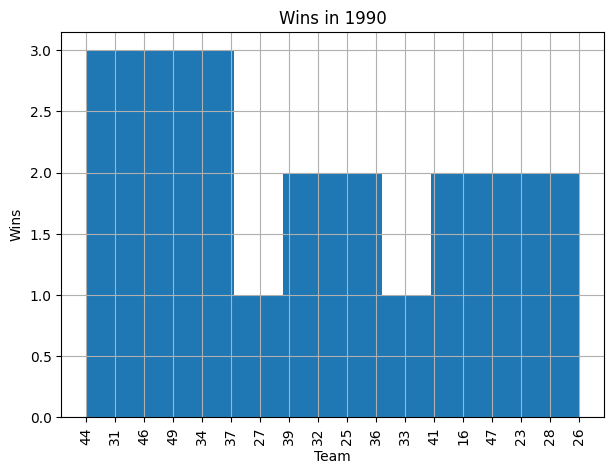

In [ ]:
df_wins['Wins'].hist(figsize=(7,5))
plt.xticks(rotation = 90)
plt.title('Wins in 1990')
plt.xlabel('Team')
plt.ylabel('Wins')
# plt.xticks(range(len(df_tmp)), df_tmp['Team'])
plt.show()

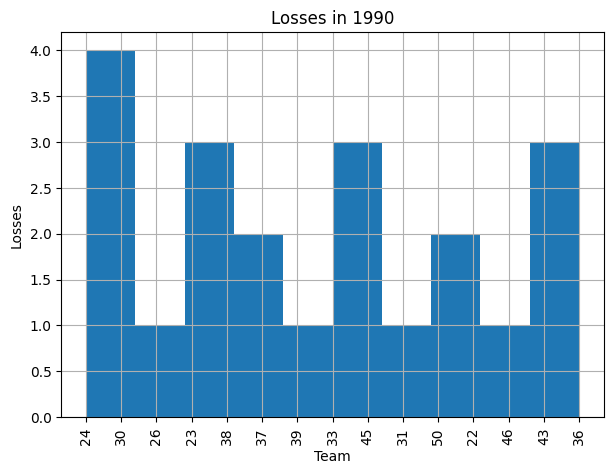

In [ ]:
df_losses['Losses'].hist(figsize=(7,5))
plt.xticks(rotation = 90)
plt.title('Losses in 1990')
plt.xlabel('Team')
plt.ylabel('Losses')
# plt.xticks(range(len(df_tmp)), df_tmp['Team'])
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

In the context of scraping the website https://www.scrapethissite.com/pages/forms/, the additional task involves searching for the hockey team 'Boston Bruins' using the available search field. You will extract the wins and losses data for this team covering the years from 1990 to 2011. After gathering this information, your task is to create a line plot where the wins and losses of the 'Boston Bruins' team are visualized across the years, displaying both trends on the same plot.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [ ]:
# Write your code here.
search = browser.find_elements(By.CLASS_NAME, 'form-control')[0]
search.send_keys('Boston Bruins')
search.click()

In [ ]:
# browser.get('https://www.scrapethissite.com/pages/forms/?q=Boston+Bruins')

In [ ]:
team_names = browser.find_elements(By.CLASS_NAME, 'name')
wins = browser.find_elements(By.CLASS_NAME, 'wins')
losses = browser.find_elements(By.CLASS_NAME, 'losses')
year = browser.find_elements(By.CLASS_NAME, 'year')
names_list = []
wins_list = []
losses_list = []
year_list = []
for i, j, z, k in zip(team_names, wins, losses, year):
  names_list.append(i.text)
  wins_list.append(int(j.text))
  losses_list.append(int(z.text))
  year_list.append(k.text)

In [ ]:
df = pd.DataFrame()
df['Team'] = names_list
df['Wins'] = wins_list
df['Losses'] = losses_list
df['Year'] = year_list

In [ ]:
df

,Team,Wins,Losses,Year
0,Boston Bruins,44,24,1990
1,Boston Bruins,36,32,1991
2,Boston Bruins,51,26,1992
3,Boston Bruins,42,29,1993
4,Boston Bruins,27,18,1994
5,Boston Bruins,40,31,1995
6,Boston Bruins,26,47,1996
7,Boston Bruins,39,30,1997
8,Boston Bruins,39,30,1998
9,Boston Bruins,24,33,1999


<Axes: xlabel='Year'>

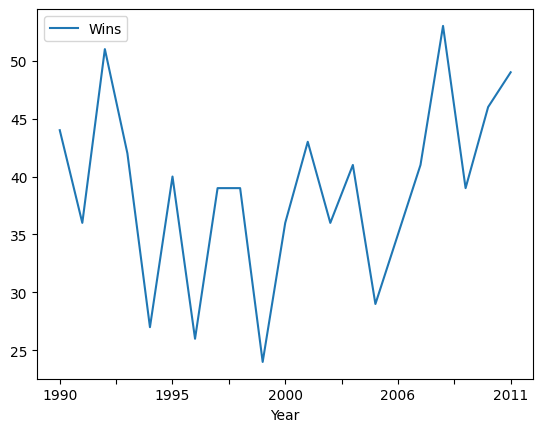

In [ ]:
df.plot.line(x='Year', y='Wins')

<Axes: xlabel='Year'>

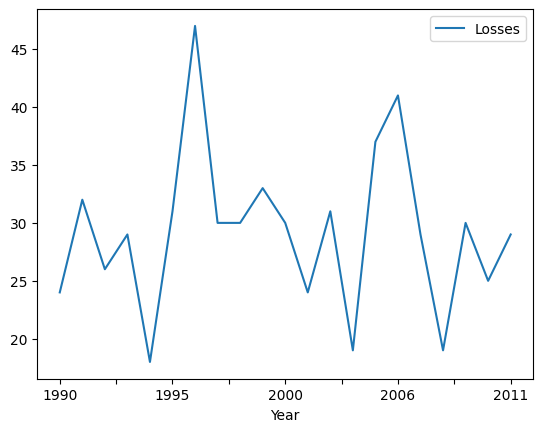

In [ ]:
df.plot.line(x='Year', y='Losses')

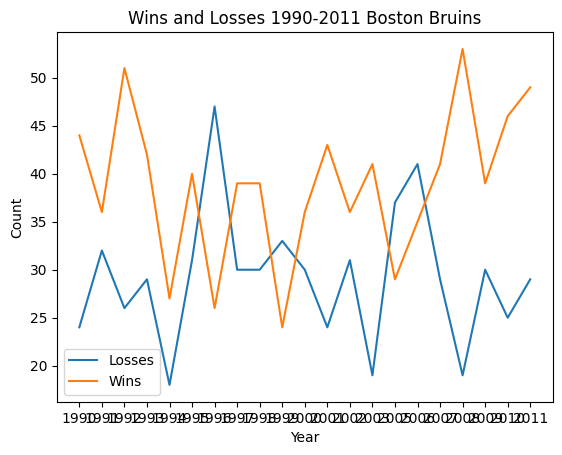

In [ ]:
plt.plot(df['Year'], df['Losses'], label='Losses')
plt.plot(df['Year'], df['Wins'], label='Wins')

# Add labels and legend
plt.title('Wins and Losses 1990-2011 Boston Bruins')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()